In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# PRE_PROCESING

## Upload Data

In [2]:
pd.set_option('display.max_columns',40)

data = pd.read_excel(r'default of credit card clients.xls')

In [3]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Describe all columns

In [4]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


## Look if there is missing value

In [5]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

## Check dependent's value counts

In [6]:
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

## Look cerrelation

In [7]:
data.corr()['default']

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_788/2983125872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['default']


ID          -0.013952
LIMIT_BAL   -0.153520
AGE          0.013890
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
default      1.000000
Name: default, dtype: float64

## Use variance_infilation_factor to measure multicollinearity beetwen the independent variables

## The columns with vif higher than 5 are removed

In [8]:
#num = (data.dtypes == 'int64')
#num_columns = list(num[num].index)

#num_columns

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
variables = data[['LIMIT_BAL',
                   'AGE',
                   'PAY_0',
                   'PAY_2',
                   'PAY_3',
                   'PAY_4',
                   'PAY_5',
                   'PAY_6',
                   'BILL_AMT1',
                   #'BILL_AMT2',
                   #'BILL_AMT3',
                   #'BILL_AMT4',
                   #'BILL_AMT5',
                   #'BILL_AMT6',
                   'PAY_AMT1',
                   'PAY_AMT2',
                   'PAY_AMT3',
                   'PAY_AMT4',
                   'PAY_AMT5',
                   'PAY_AMT6']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,3.780038,LIMIT_BAL
1,2.834126,AGE
2,1.914403,PAY_0
3,3.202231,PAY_2
4,3.703033,PAY_3
5,4.425667,PAY_4
6,4.959696,PAY_5
7,3.390413,PAY_6
8,1.960275,BILL_AMT1
9,1.341414,PAY_AMT1


## Find out if there is Outlier

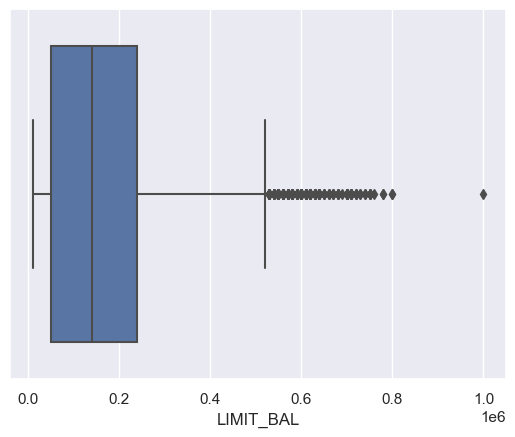

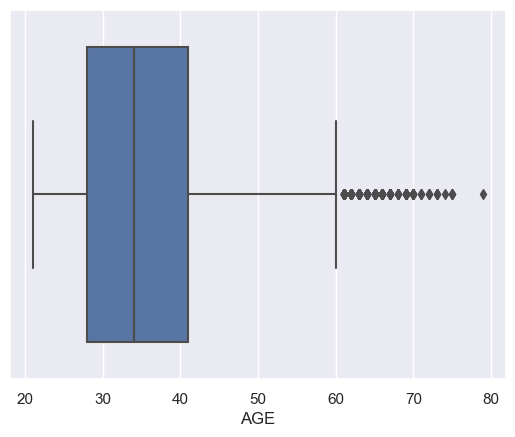

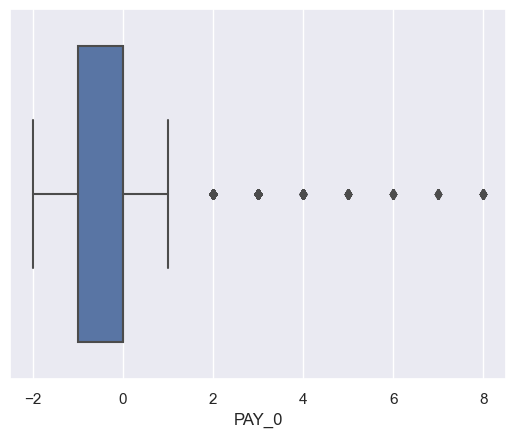

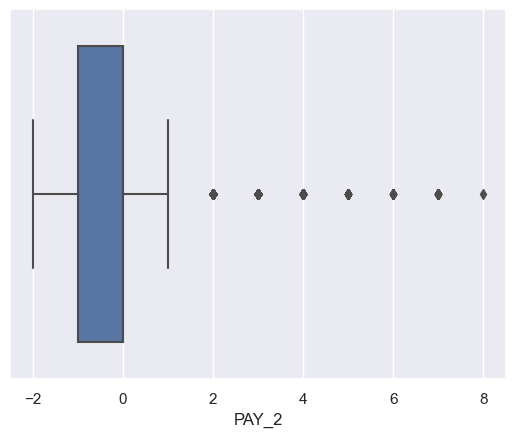

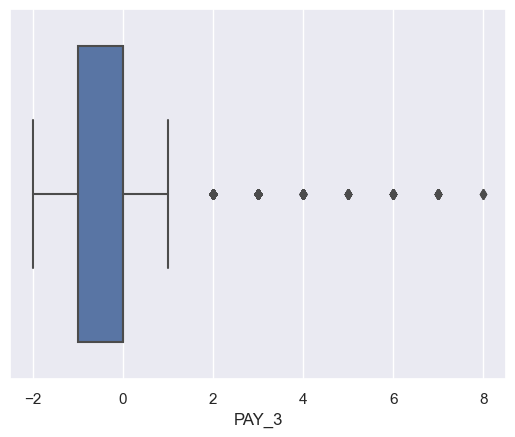

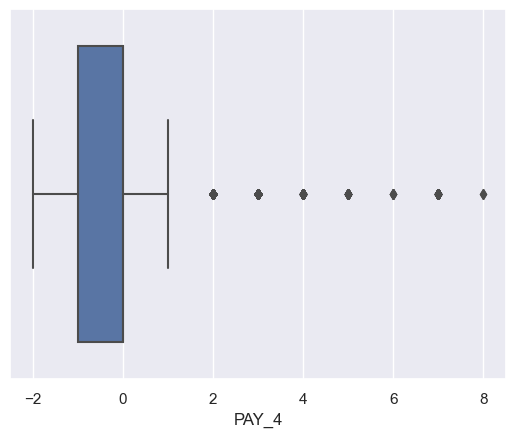

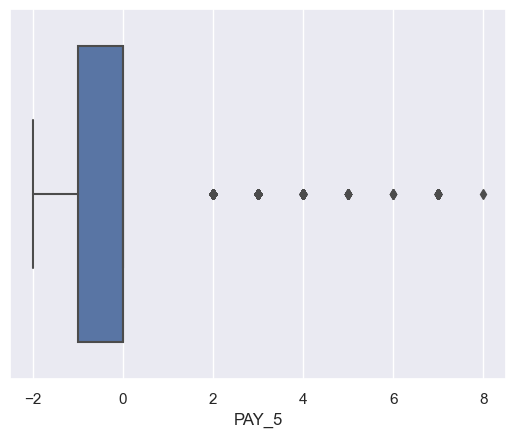

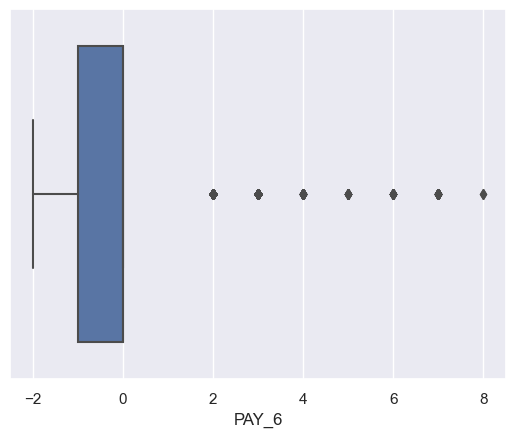

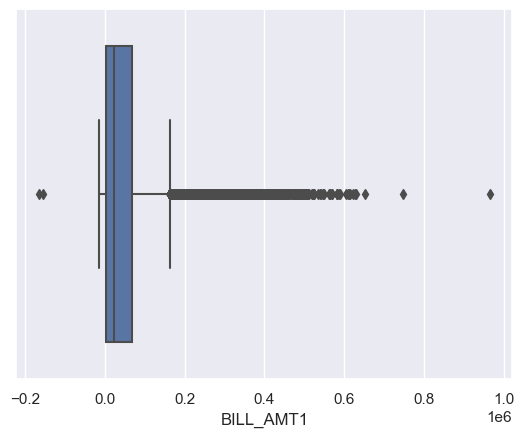

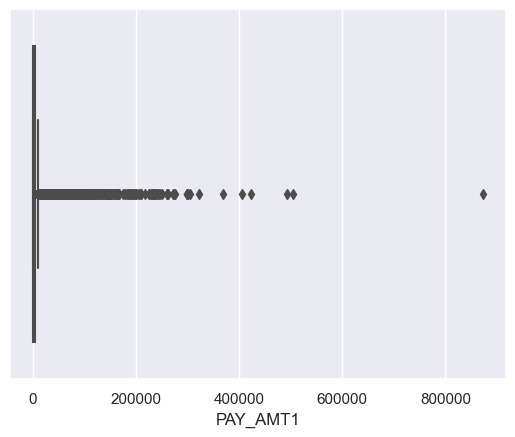

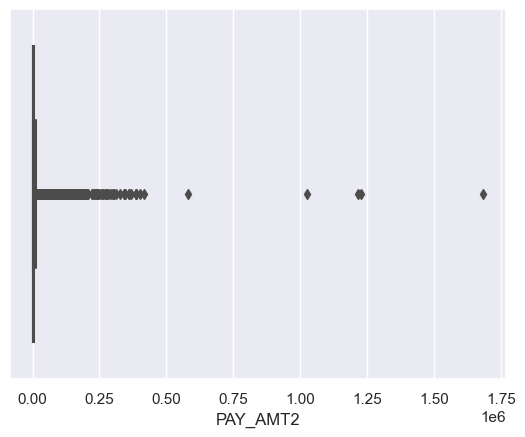

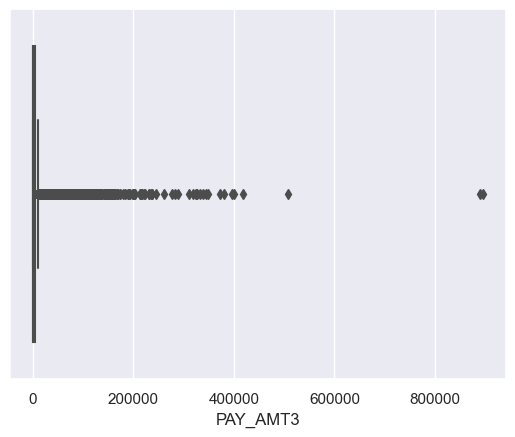

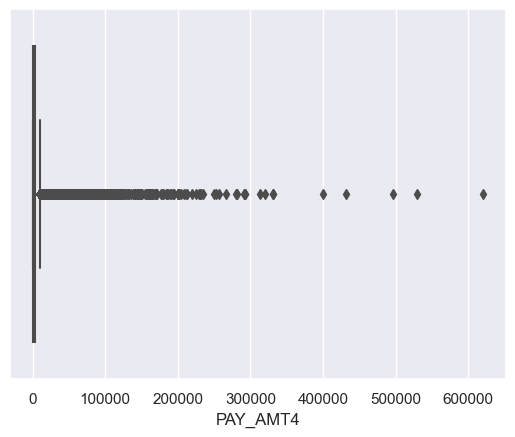

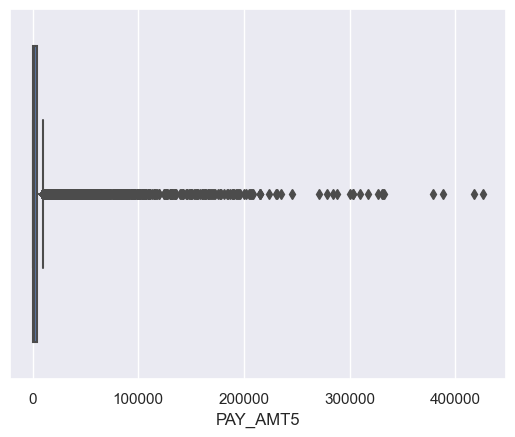

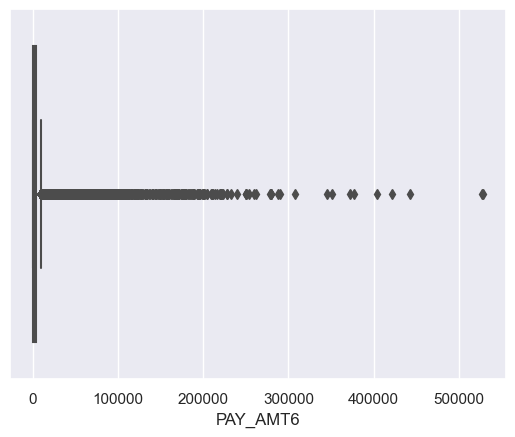

In [11]:
for i in data[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## NOTE
### First,  I droped this columns ' PAY_0, PAY_2 ...... PAY_6'  because of value counts and got very low Gini. For example: in Logistic Regression Gini was 32 %. But now we got 52 % . That's why I choose to not droped this columns this time.

In [12]:
#data.PAY_0.value_counts()
#data.PAY_2.value_counts()
#data.PAY_3.value_counts()
#data.PAY_4.value_counts()
#data.PAY_5.value_counts()
data.PAY_6.value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

## Outlier treatment

In [13]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_788/59704685.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_788/59704685.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


In [14]:
for i in data[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])

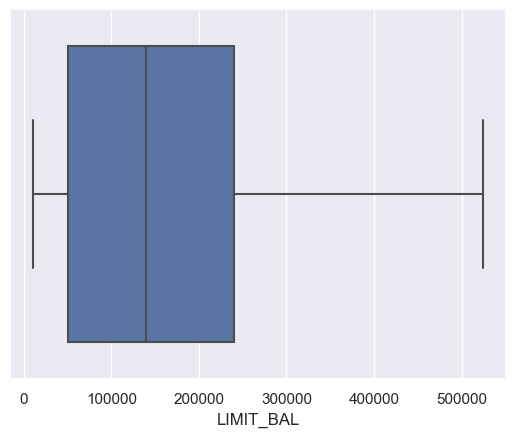

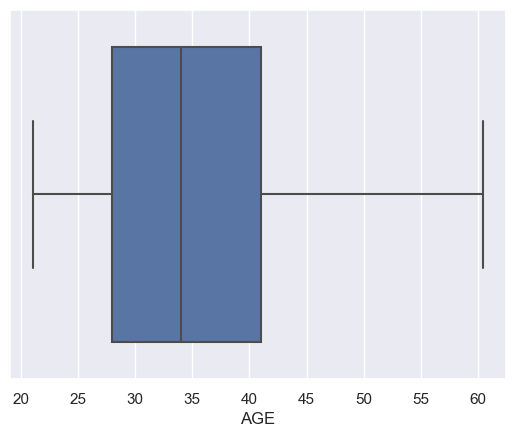

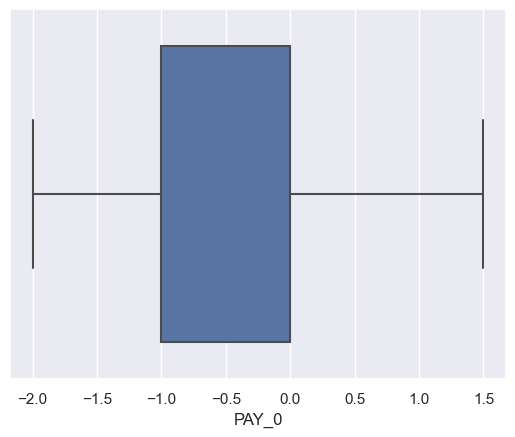

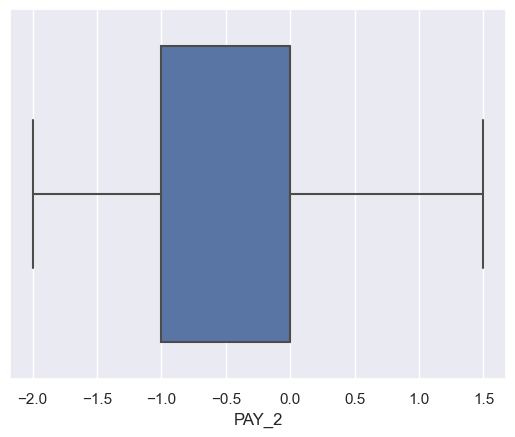

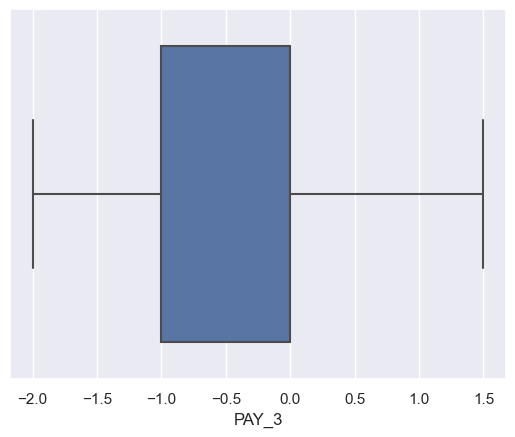

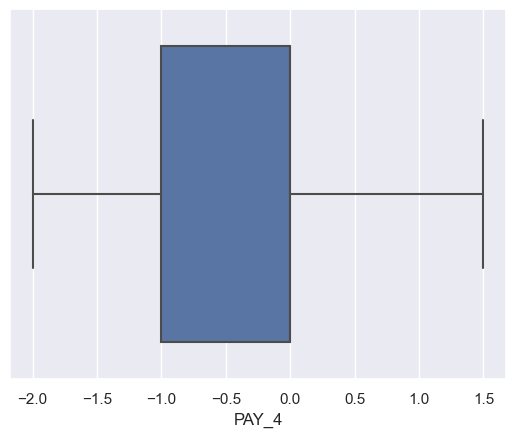

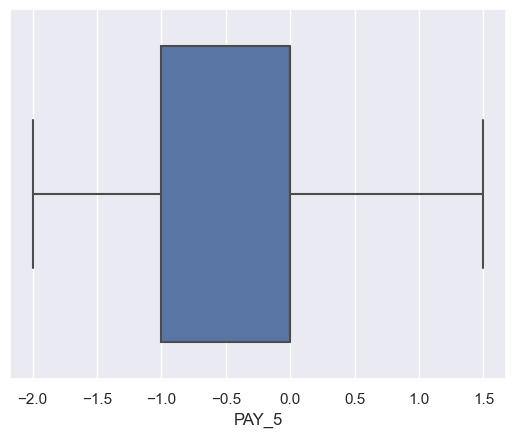

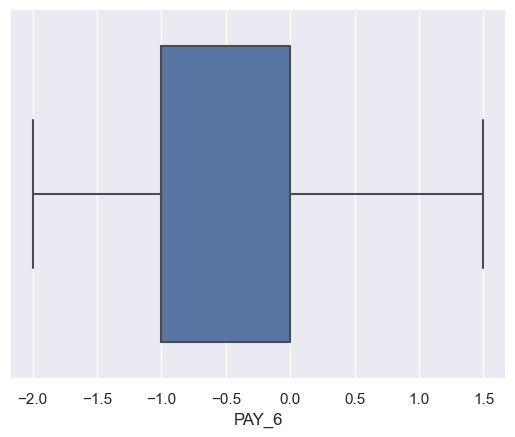

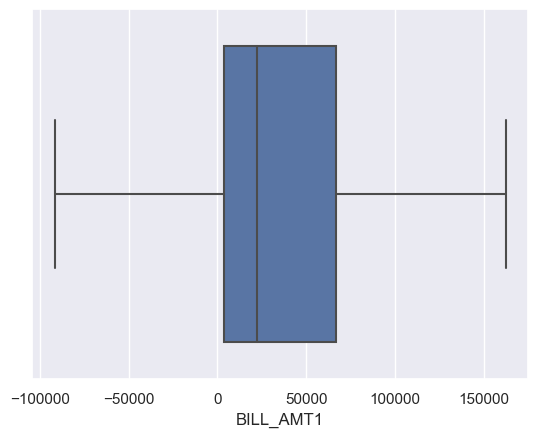

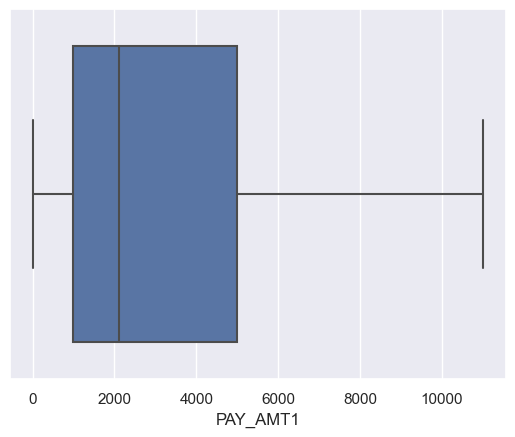

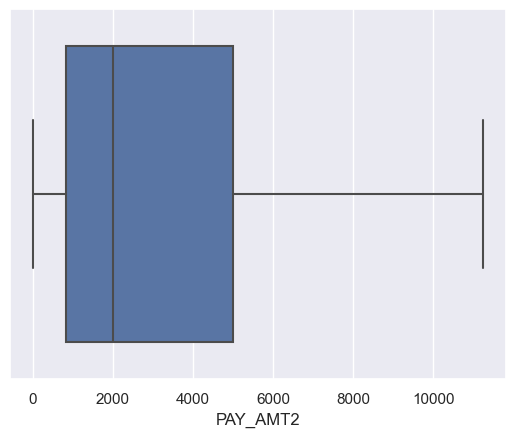

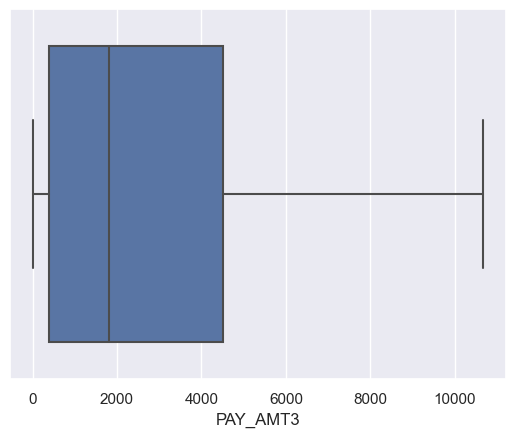

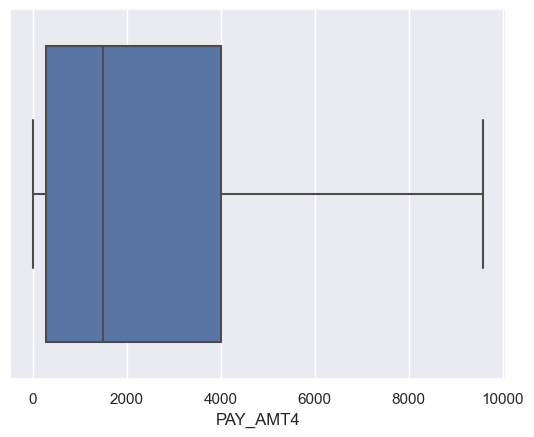

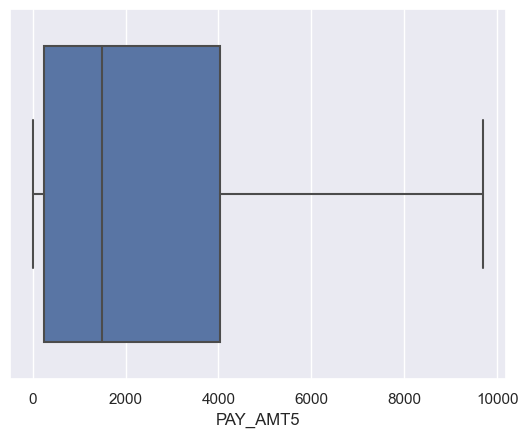

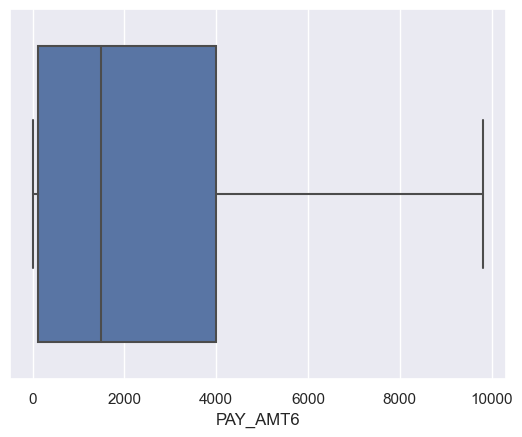

In [15]:
for i in data[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Before the conversion part, we are going to create three data: 

### 1) data_w = going to convert with woe transformation 
### 2) data_d = going to convert with dumies method 
### 3) data_cb = for Catboost model with categoric columns include


In [16]:
data_w = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']]

data_d = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']]

data_cb = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']]

## WOE transformation:

## But first we have to transform numeric columns to categorical and for that we are using quantile method. 

In [17]:
#data_w

In [18]:
num_variables = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

for var in num_variables:
     q1 = data_w[var].quantile(0.25)
     q2 = data_w[var].quantile(0.5)
     q3 = data_w[var].quantile(0.75)

    
     ranges = [-np.inf, q1, q2, q3, np.inf]
     data_w[var+'_category'] = pd.cut(data_w[var], bins=ranges,duplicates='drop')
    
     grouped = data_w.groupby([var+'_category', 'default'])['default'].count().unstack().reset_index()
    

     grouped['positive_prop'] = grouped[0] / grouped[0].sum()
     grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
     grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
     grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
     data_w = data_w.merge(grouped[[var+'_category',var+'_woe']], how='left', on=var+'_category')


/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_788/3741648956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_w[var+'_category'] = pd.cut(data_w[var], bins=ranges,duplicates='drop')


In [19]:
cat_variables = ['SEX','EDUCATION','MARRIAGE']

for var in cat_variables:
     grouped = data_w.groupby([var, 'default'])['default'].count().unstack().reset_index()

     grouped['positive_prop'] = grouped[0] / grouped[0].sum()
     grouped['negative_prop'] = grouped[1] / grouped[1].sum()

     grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

     grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
     data_w = data_w.merge(grouped[[var,var+'_woe']], how='left', on=var)


In [20]:
data_w

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_BAL_category,...,PAY_5_woe,PAY_6_category,PAY_6_woe,BILL_AMT1_category,BILL_AMT1_woe,PAY_AMT1_category,PAY_AMT1_woe,PAY_AMT2_category,PAY_AMT2_woe,PAY_AMT3_category,PAY_AMT3_woe,PAY_AMT4_category,PAY_AMT4_woe,PAY_AMT5_category,PAY_AMT5_woe,PAY_AMT6_category,PAY_AMT6_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,20000.0,female,university,married,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,0.0,689.0,0.0,0.0,0.0,0.0,1,"(-inf, 50000.0]",...,0.273392,"(-inf, -1.0]",0.231318,"(3558.75, 22381.5]",-0.046608,"(-inf, 1000.0]",-0.490526,"(-inf, 833.0]",-0.446938,"(-inf, 390.0]",-0.433563,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316,0.079777,-0.091416,-0.076822
1,120000.0,female,university,single,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(50000.0, 140000.0]",...,0.200910,"(0.0, inf]",-1.351641,"(-inf, 3558.75]",-0.050376,"(-inf, 1000.0]",-0.490526,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(-inf, 252.5]",-0.332013,"(1500.0, 4000.0]",0.084355,0.079777,-0.091416,0.070563
2,90000.0,female,university,single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(50000.0, 140000.0]",...,0.200910,"(-1.0, 0.0]",0.201465,"(22381.5, 67091.0]",-0.022307,"(1000.0, 2100.0]",0.001529,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(4000.0, inf]",0.487966,0.079777,-0.091416,0.070563
3,50000.0,female,university,married,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(-inf, 50000.0]",...,0.200910,"(-1.0, 0.0]",0.201465,"(22381.5, 67091.0]",-0.022307,"(1000.0, 2100.0]",0.001529,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195,0.079777,-0.091416,-0.076822
4,50000.0,male,university,married,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,"(-inf, 50000.0]",...,0.200910,"(-1.0, 0.0]",0.201465,"(3558.75, 22381.5]",-0.046608,"(1000.0, 2100.0]",0.001529,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195,-0.115154,-0.091416,-0.076822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0,"(140000.0, 240000.0]",...,0.200910,"(-1.0, 0.0]",0.201465,"(67091.0, inf]",0.125109,"(5006.0, inf]",0.573972,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(117.75, 1500.0]",-0.110195,-0.115154,-0.168463,-0.076822
29996,150000.0,male,high school,single,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,"(140000.0, 240000.0]",...,0.200910,"(-1.0, 0.0]",0.201465,"(-inf, 3558.75]",-0.050376,"(1000.0, 2100.0]",0.001529,"(2009.0, 5000.0]",0.102160,"(4505.0, inf]",0.518216,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316,-0.115154,-0.168463,0.070563
29997,30000.0,male,university,single,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,"(-inf, 50000.0]",...,0.200910,"(-1.0, 0.0]",0.201465,"(3558.75, 22381.5]",-0.046608,"(-inf, 1000.0]",-0.490526,"(-inf, 833.0]",-0.446938,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(1500.0, 4031.5]",0.075433,"(1500.0, 4000.0]",0.084355,-0.115154,-0.091416,0.070563
29998,80000.0,male,high school,married,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,"(50000.0, 140000.0]",...,0.200910,"(-inf, -1.0]",0.231318,"(-inf, 3558.75]",-0.050376,"(5006.0, inf]

## After WOE transformation we checking again if there is missing value

In [21]:
data_w.isnull().sum()

LIMIT_BAL              0
SEX                    0
EDUCATION              0
MARRIAGE               0
AGE                    0
PAY_0                  0
PAY_2                  0
PAY_3                  0
PAY_4                  0
PAY_5                  0
PAY_6                  0
BILL_AMT1              0
PAY_AMT1               0
PAY_AMT2               0
PAY_AMT3               0
PAY_AMT4               0
PAY_AMT5               0
PAY_AMT6               0
default                0
LIMIT_BAL_category     0
LIMIT_BAL_woe          0
AGE_category           0
AGE_woe                0
PAY_0_category         0
PAY_0_woe              0
PAY_2_category         0
PAY_2_woe              0
PAY_3_category         0
PAY_3_woe              0
PAY_4_category         0
PAY_4_woe              0
PAY_5_category         0
PAY_5_woe              0
PAY_6_category         0
PAY_6_woe              0
BILL_AMT1_category     0
BILL_AMT1_woe          0
PAY_AMT1_category      0
PAY_AMT1_woe           0
PAY_AMT2_category      0


In [22]:
data_w['EDUCATION_woe'] = data_w['EDUCATION_woe'].fillna(value = data_w['EDUCATION_woe'].mode()[0])

In [23]:
data_w.isnull().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
default               0
LIMIT_BAL_category    0
LIMIT_BAL_woe         0
AGE_category          0
AGE_woe               0
PAY_0_category        0
PAY_0_woe             0
PAY_2_category        0
PAY_2_woe             0
PAY_3_category        0
PAY_3_woe             0
PAY_4_category        0
PAY_4_woe             0
PAY_5_category        0
PAY_5_woe             0
PAY_6_category        0
PAY_6_woe             0
BILL_AMT1_category    0
BILL_AMT1_woe         0
PAY_AMT1_category     0
PAY_AMT1_woe          0
PAY_AMT2_category     0
PAY_AMT2_woe          0
PAY_AMT3_categor

## Create final data conversion with woe

In [24]:
#data_w.columns

In [25]:
data_with_woe = data_w[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'LIMIT_BAL_category', 'LIMIT_BAL_woe', 'AGE_category', 'AGE_woe',
       'PAY_0_category', 'PAY_0_woe', 'PAY_2_category', 'PAY_2_woe',
       'PAY_3_category', 'PAY_3_woe', 'PAY_4_category', 'PAY_4_woe',
       'PAY_5_category', 'PAY_5_woe', 'PAY_6_category', 'PAY_6_woe',
       'BILL_AMT1_category', 'BILL_AMT1_woe', 'PAY_AMT1_category',
       'PAY_AMT1_woe', 'PAY_AMT2_category', 'PAY_AMT2_woe',
       'PAY_AMT3_category', 'PAY_AMT3_woe', 'PAY_AMT4_category',
       'PAY_AMT4_woe', 'PAY_AMT5_category', 'PAY_AMT5_woe',
       'PAY_AMT6_category', 'PAY_AMT6_woe', 'SEX_woe', 'EDUCATION_woe',
       'MARRIAGE_woe','default']]
data_with_woe

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL_category,LIMIT_BAL_woe,...,PAY_6_category,PAY_6_woe,BILL_AMT1_category,BILL_AMT1_woe,PAY_AMT1_category,PAY_AMT1_woe,PAY_AMT2_category,PAY_AMT2_woe,PAY_AMT3_category,PAY_AMT3_woe,PAY_AMT4_category,PAY_AMT4_woe,PAY_AMT5_category,PAY_AMT5_woe,PAY_AMT6_category,PAY_AMT6_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe,default
0,20000.0,female,university,married,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,0.0,689.0,0.0,0.0,0.0,0.0,"(-inf, 50000.0]",-0.495127,...,"(-inf, -1.0]",0.231318,"(3558.75, 22381.5]",-0.046608,"(-inf, 1000.0]",-0.490526,"(-inf, 833.0]",-0.446938,"(-inf, 390.0]",-0.433563,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316,0.079777,-0.091416,-0.076822,1
1,120000.0,female,university,single,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,0.0,1000.0,1000.0,1000.0,0.0,2000.0,"(50000.0, 140000.0]",-0.144958,...,"(0.0, inf]",-1.351641,"(-inf, 3558.75]",-0.050376,"(-inf, 1000.0]",-0.490526,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(-inf, 252.5]",-0.332013,"(1500.0, 4000.0]",0.084355,0.079777,-0.091416,0.070563,1
2,90000.0,female,university,single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,"(50000.0, 140000.0]",-0.144958,...,"(-1.0, 0.0]",0.201465,"(22381.5, 67091.0]",-0.022307,"(1000.0, 2100.0]",0.001529,"(833.0, 2009.0]",-0.073048,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(4000.0, inf]",0.487966,0.079777,-0.091416,0.070563,0
3,50000.0,female,university,married,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,"(-inf, 50000.0]",-0.495127,...,"(-1.0, 0.0]",0.201465,"(22381.5, 67091.0]",-0.022307,"(1000.0, 2100.0]",0.001529,"(2009.0, 5000.0]",0.102160,"(390.0, 1800.0]",-0.049033,"(296.0, 1500.0]",-0.095090,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195,0.079777,-0.091416,-0.076822,0
4,50000.0,male,university,married,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,2000.0,11250.5,10000.0,9000.0,689.0,679.0,"(-inf, 50000.0]",-0.495127,...,"(-1.0, 0.0]",0.201465,"(3558.75, 22381.5]",-0.046608,"(1000.0, 2100.0]",0.001529,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(252.5, 1500.0]",-0.093587,"(117.75, 1500.0]",-0.110195,-0.115154,-0.091416,-0.076822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,"(140000.0, 240000.0]",0.302391,...,"(-1.0, 0.0]",0.201465,"(67091.0, inf]",0.125109,"(5006.0, inf]",0.573972,"(5000.0, inf]",0.583415,"(4505.0, inf]",0.518216,"(1500.0, 4013.25]",0.117762,"(4031.5, inf]",0.438752,"(117.75, 1500.0]",-0.110195,-0.115154,-0.168463,-0.076822,0
29996,150000.0,male,high school,single,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,1837.0,3526.0,8998.0,129.0,0.0,0.0,"(140000.0, 240000.0]",0.302391,...,"(-1.0, 0.0]",0.201465,"(-inf, 3558.75]",-0.050376,"(1000.0, 2100.0]",0.001529,"(2009.0, 5000.0]",0.102160,"(4505.0, inf]",0.518216,"(-inf, 296.0]",-0.381443,"(-inf, 252.5]",-0.332013,"(-inf, 117.75]",-0.350316,-0.115154,-0.168463,0.070563,0
29997,30000.0,male,university,single,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,0.0,0.0,10677.5,4200.0,2000.0,3100.0,"(-inf, 50000.0]",-0.495127,...,"(-1.0, 0.0]",0.201465,"(3558.75, 22381.5]",-0.046608,"(-inf, 1000.0]",-0.490526,"(-inf, 833.0]",-0.446938,"(4505.0, inf]",0.518216,"(4013.25, inf]",0.470695,"(1500.0, 4031.5]",0.075433,"(1500.0, 4000.0]",0.084355,-0.115154,-0.091416,0.070563,1
29998,80000.0,male,high school,married,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,"(50000.0, 140000.0]",-0.144958,...,"(-inf, -1.0]",0.231318,"(-inf, 3558.75]",-0.050376,"(500

## Now convert data using dumies method

In [26]:
#data_d

In [27]:
data_d = pd.get_dummies(data_d, drop_first=True)

data_d

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0
1,120000.0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,0,0,1,0,1
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,0,0,1,0,1
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,0,0,1,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0,1,1,0,0,0,0,0
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,1,1,0,0,0,0,1
29997,30000.0,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,1,0,0,0,1,0,1
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,1,1,0,0,0,0,0


## We checking again if there is missing value

In [28]:
data_d.isnull().sum()

LIMIT_BAL                 0
AGE                       0
PAY_0                     0
PAY_2                     0
PAY_3                     0
PAY_4                     0
PAY_5                     0
PAY_6                     0
BILL_AMT1                 0
PAY_AMT1                  0
PAY_AMT2                  0
PAY_AMT3                  0
PAY_AMT4                  0
PAY_AMT5                  0
PAY_AMT6                  0
default                   0
SEX_male                  0
EDUCATION_high school     0
EDUCATION_not educated    0
EDUCATION_others          0
EDUCATION_university      0
MARRIAGE_others           0
MARRIAGE_single           0
dtype: int64

## And create final data conversion with dumies

In [29]:
#data_d.columns

In [30]:
data_with_dumies = data_d[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single','default']]
data_with_dumies

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single,default
0,20000.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,0.0,689.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1
1,120000.0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,0,0,0,1,0,1,1
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,0,1,0,1,0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,0,1,0,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,2000.0,11250.5,10000.0,9000.0,689.0,679.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,1,1,0,0,0,0,0,0
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,1837.0,3526.0,8998.0,129.0,0.0,0.0,1,1,0,0,0,0,1,0
29997,30000.0,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,0,0,0,1,0,1,1
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,1,0,0,0,0,0,1


*
*
*
*
*

___

# MODELLING

# Logistic regression

### In this model we can only use data converted with woe = data_with_woe

In [31]:
#data_with_woe.columns

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
inputs = data_with_woe[['LIMIT_BAL_woe', 'AGE_woe','PAY_0_woe', 'PAY_2_woe',
                        'PAY_3_woe',  'PAY_4_woe','PAY_5_woe', 'PAY_6_woe', 
                        'BILL_AMT1_woe', 'PAY_AMT1_woe','PAY_AMT2_woe', 'PAY_AMT3_woe', 
                        'PAY_AMT4_woe','PAY_AMT5_woe', 'PAY_AMT6_woe', 'SEX_woe', 
                        'EDUCATION_woe', 'MARRIAGE_woe']]
output = data_with_woe['default']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(inputs,output,test_size = 0.3, random_state = 42)

In [35]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')
    
    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

In [36]:
log_reg_woe = LogisticRegression()
log_reg_woe.fit(X_train,y_train)

LogisticRegression()

In [37]:
result_log_reg_woe = evaluate(log_reg_woe, X_test, y_test)

Model Performance
Gini pred is 24.412975417439696
Gini prob is 51.821160424397014
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7040
           1       0.62      0.30      0.40      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000

[[6679  361]
 [1381  579]]


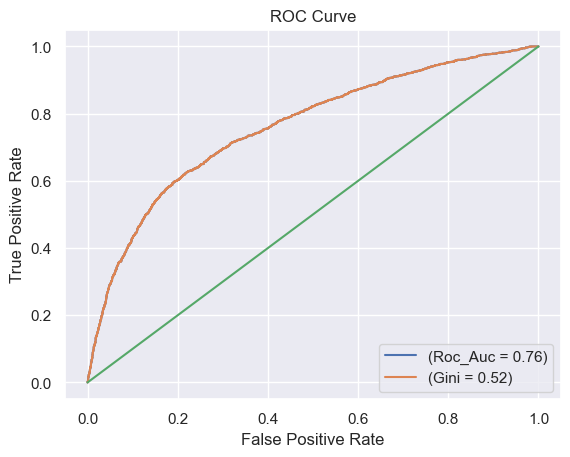

In [38]:
y_prob = log_reg_woe.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

*
*
*
*
*

___

# SVM Classifier


## In this model we are going to built two default model: 
### 1) Default model with woe = we will choose data conversion with woe
### 2) Default model with dumies = we will choose data conversion with dumies

## In Optimized part, we will use 'Default model with dumies'

_

In [99]:
from sklearn import svm

## SVM Default model with woe 

In [40]:
# data_with_woe.columns

In [41]:
inputs = data_with_woe[['LIMIT_BAL_woe', 'AGE_woe','PAY_0_woe', 'PAY_2_woe',
                        'PAY_3_woe',  'PAY_4_woe','PAY_5_woe', 'PAY_6_woe', 
                        'BILL_AMT1_woe', 'PAY_AMT1_woe','PAY_AMT2_woe', 'PAY_AMT3_woe', 
                        'PAY_AMT4_woe','PAY_AMT5_woe', 'PAY_AMT6_woe', 'SEX_woe', 
                        'EDUCATION_woe', 'MARRIAGE_woe']]
output = data_with_woe['default']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(inputs,output,test_size = 0.3, random_state = 42)

In [43]:
def evaluatee(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print('Model Performance')
    print('Accuracy is', accuracy)
    
    return accuracy

In [44]:
SVM_base_model_woe = svm.SVC(probability=True)
SVM_base_model_woe.fit(X_train, y_train)

SVC(probability=True)

In [45]:
SVM_base_accuracy = evaluatee(SVM_base_model_woe, X_test, y_test)

Model Performance
Accuracy is 81.15555555555557


## SVM Default model with dumies

In [46]:
# data_with_dumies.columns

In [47]:
inputs = data_with_dumies[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single']]
output = data_with_dumies['default']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(inputs,output,test_size = 0.3, random_state = 42)

In [49]:
SVM_base_model_dum = svm.SVC(probability=True)
SVM_base_model_dum.fit(X_train, y_train)

SVC(probability=True)

In [50]:
SVM_base_accuracy = evaluatee(SVM_base_model_dum, X_test, y_test)

Model Performance
Accuracy is 78.22222222222223


## SVM Optimized model

In [51]:
kernel = ['poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto'] 
C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [52]:
svc_random = RandomizedSearchCV(estimator = SVM_base_model_woe, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=1, n_jobs = -1)
svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_iter=3, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

In [53]:
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 10000.0}

In [54]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluatee(optimized_model, X_test, y_test)

Model Performance
Accuracy is 78.02222222222223


*
*
*
*
*


___

# Random Forest Classifier

### The treebase models are not so efficent in data that conversion with 'woe'.  That's why we are going to use data conversion with 'dumies method' = data_with_dum

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# data_with_dumies.columns

In [57]:
inputs = data_with_dumies[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single']]
output = data_with_dumies['default']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(inputs,output,test_size = 0.3, random_state = 42)

In [59]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

## RF Default Model 

In [77]:
rfc_base = RandomForestClassifier()
rfc_base.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
rfc_result = evaluate(rfc_base, X_test, y_test)

Model Performance
Gini pred is 30.890248144712416
Gini prob is 51.67457821196662


## RF Optimized Model

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [80]:
rf_random = RandomizedSearchCV(estimator = rfc_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [83]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini pred is 30.640653988868284
Gini prob is 54.803904800556595


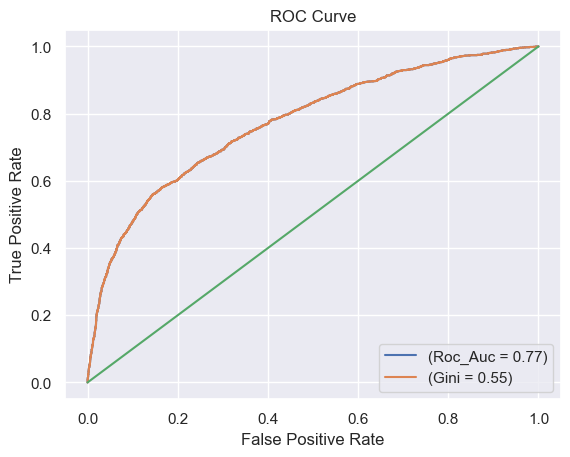

In [84]:
y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

*
*
*
*
*

___

# Catboost model

## First catboost model with categoric columns

In [71]:
data_cb.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [72]:
inputs = data_cb[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

output = data_cb['default']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [74]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

In [92]:
from catboost import CatBoostClassifier

In [76]:
catboost_model = CatBoostClassifier(cat_features=['SEX', 'EDUCATION', 'MARRIAGE'])
catboost_model.fit(X_train, y_train)

Learning rate set to 0.037803
0:	learn: 0.6713303	total: 73.6ms	remaining: 1m 13s
1:	learn: 0.6516830	total: 84.8ms	remaining: 42.3s
2:	learn: 0.6333303	total: 96.5ms	remaining: 32.1s
3:	learn: 0.6164171	total: 108ms	remaining: 26.8s
4:	learn: 0.6009488	total: 118ms	remaining: 23.5s
5:	learn: 0.5868382	total: 127ms	remaining: 21.1s
6:	learn: 0.5750747	total: 134ms	remaining: 19s
7:	learn: 0.5633234	total: 143ms	remaining: 17.8s
8:	learn: 0.5524585	total: 153ms	remaining: 16.8s
9:	learn: 0.5427374	total: 164ms	remaining: 16.2s
10:	learn: 0.5337502	total: 174ms	remaining: 15.7s
11:	learn: 0.5253634	total: 185ms	remaining: 15.2s
12:	learn: 0.5181260	total: 196ms	remaining: 14.9s
13:	learn: 0.5111325	total: 206ms	remaining: 14.5s
14:	learn: 0.5051545	total: 214ms	remaining: 14s
15:	learn: 0.4995104	total: 225ms	remaining: 13.8s
16:	learn: 0.4939773	total: 235ms	remaining: 13.6s
17:	learn: 0.4889802	total: 246ms	remaining: 13.4s
18:	learn: 0.4846239	total: 257ms	remaining: 13.3s
19:	learn: 

In [77]:
result_catboost_model = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 55.178933789424846
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6658  382]
 [1233  727]]


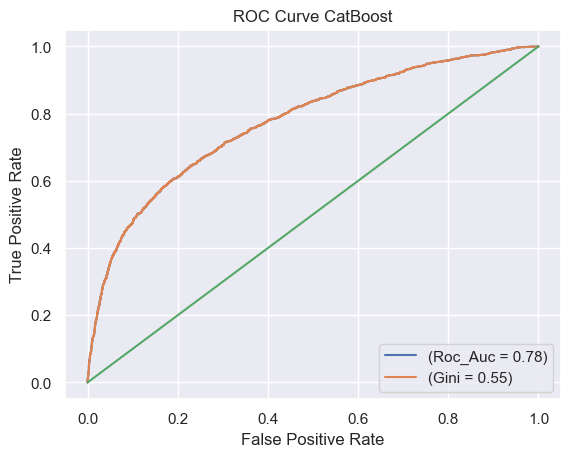

In [78]:
y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

## Default Catboost model after conversion
_

In [79]:
# data_with_dumies.columns

In [80]:
inputs = data_with_dumies[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single']]
output = data_with_dumies['default']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [82]:
catboost_model_dum = CatBoostClassifier()
catboost_model_dum.fit(X_train, y_train)

Learning rate set to 0.037803
0:	learn: 0.6718146	total: 7.05ms	remaining: 7.04s
1:	learn: 0.6521813	total: 12.9ms	remaining: 6.42s
2:	learn: 0.6337702	total: 18.3ms	remaining: 6.07s
3:	learn: 0.6169002	total: 23.3ms	remaining: 5.81s
4:	learn: 0.6015619	total: 28.6ms	remaining: 5.69s
5:	learn: 0.5878248	total: 33.8ms	remaining: 5.61s
6:	learn: 0.5750327	total: 38.8ms	remaining: 5.51s
7:	learn: 0.5631141	total: 43.4ms	remaining: 5.38s
8:	learn: 0.5524240	total: 47.7ms	remaining: 5.25s
9:	learn: 0.5432207	total: 52.1ms	remaining: 5.16s
10:	learn: 0.5342890	total: 56.9ms	remaining: 5.12s
11:	learn: 0.5258567	total: 61.5ms	remaining: 5.07s
12:	learn: 0.5181921	total: 66.3ms	remaining: 5.03s
13:	learn: 0.5112605	total: 71.3ms	remaining: 5.02s
14:	learn: 0.5048991	total: 76.9ms	remaining: 5.05s
15:	learn: 0.4991749	total: 81.7ms	remaining: 5.02s
16:	learn: 0.4938393	total: 86ms	remaining: 4.97s
17:	learn: 0.4891970	total: 90.4ms	remaining: 4.93s
18:	learn: 0.4853113	total: 93.6ms	remaining: 

In [83]:
result_catboost_model_dum = evaluate(catboost_model_dum, X_test, y_test)

Model Performance
Gini prob is 55.22560586734693
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.65      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6645  395]
 [1234  726]]


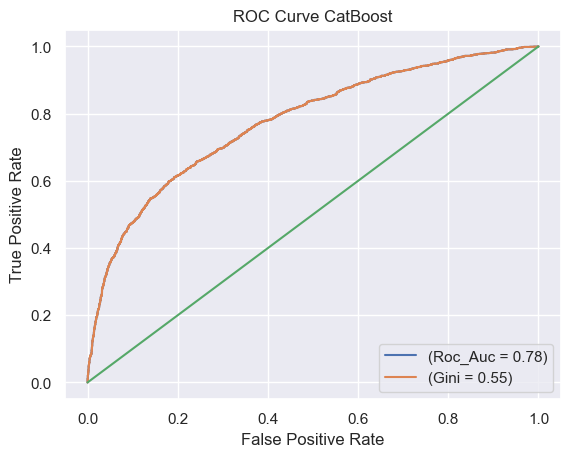

In [84]:
y_prob = catboost_model_dum.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

## Optimized Catboost model

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)}

In [87]:
random_search_catboost = RandomizedSearchCV(catboost_model_dum,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_catboost.fit(X_train, y_train)

0:	learn: 0.6408922	total: 71.2ms	remaining: 35.5s
1:	learn: 0.5994034	total: 75.7ms	remaining: 18.9s
2:	learn: 0.5672200	total: 86.9ms	remaining: 14.4s
3:	learn: 0.5411089	total: 93.9ms	remaining: 11.6s
4:	learn: 0.5226344	total: 103ms	remaining: 10.2s
5:	learn: 0.5055583	total: 109ms	remaining: 8.94s
6:	learn: 0.4921587	total: 113ms	remaining: 7.94s
7:	learn: 0.4811760	total: 117ms	remaining: 7.2s
8:	learn: 0.4722060	total: 122ms	remaining: 6.68s
9:	learn: 0.4663391	total: 134ms	remaining: 6.57s
10:	learn: 0.4605588	total: 139ms	remaining: 6.19s
11:	learn: 0.4553572	total: 143ms	remaining: 5.83s
12:	learn: 0.4512095	total: 149ms	remaining: 5.57s
13:	learn: 0.4484520	total: 155ms	remaining: 5.37s
14:	learn: 0.4457472	total: 159ms	remaining: 5.15s
15:	learn: 0.4437257	total: 175ms	remaining: 5.3s
16:	learn: 0.4416816	total: 185ms	remaining: 5.24s
17:	learn: 0.4401579	total: 191ms	remaining: 5.11s
18:	learn: 0.4388707	total: 198ms	remaining: 5.02s
19:	learn: 0.4376322	total: 207ms	remai

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x144e9e3e0>,
                   n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [88]:
optimized_catboost_model_dum = random_search_catboost.best_estimator_
optmized_accuracy_catboost_dum = evaluate(optimized_catboost_model_dum, X_test, y_test)

Model Performance
Gini prob is 54.45108853200369
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6691  349]
 [1260  700]]


*
*
*
*
*

___

## XGB Model

In [90]:
from xgboost import XGBClassifier

In [90]:
inputs = data_with_dumies[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single']]
output = data_with_dumies['default']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

## XGB Default model 

In [92]:
xgb_model_dum = XGBClassifier()
xgb_model_dum.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [93]:
result_xgb_model_dum = evaluate(xgb_model_dum, X_test, y_test)

Model Performance
Gini prob is 51.71192312152133
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.61      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6590  450]
 [1259  701]]


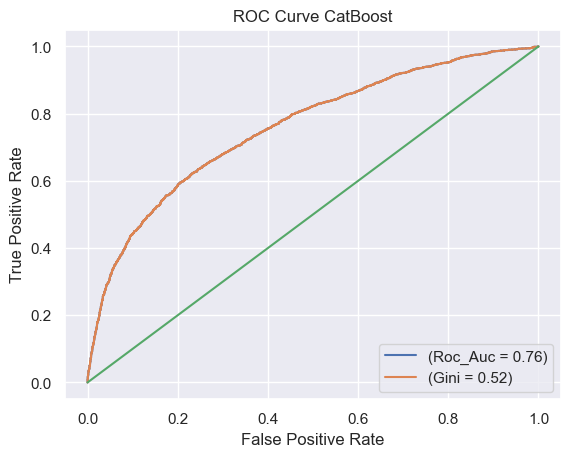

In [94]:
y_prob = xgb_model_dum.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

## Optimized XGB model

In [95]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'subsample': np.linspace(0.5, 1, num=6), 
    'colsample_bytree': np.linspace(0.5, 1, num=6), 
    'gamma': [0, 1, 5], 
}

In [96]:
random_search_xgb = RandomizedSearchCV(xgb_model_dum,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42)

In [97]:
optimized_xgb_model_dum = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_xgb_model_dum, X_test, y_test)

Model Performance
Gini prob is 55.124072356215216
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6683  357]
 [1254  706]]


*
*
*
*
*

___

# Stacking Model

In [85]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [86]:
inputs = data_with_dumies[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_high school',
       'EDUCATION_not educated', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_others', 'MARRIAGE_single']]
output = data_with_dumies['default']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [106]:
base_classifiers = [
    RandomForestClassifier(),
    XGBClassifier(),
    LogisticRegression()
]

In [107]:
meta_classifier = CatBoostClassifier()

In [108]:
stacking_model_dum = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [109]:
stacking_model_dum.fit(X_train, y_train)

Fitting 3 classifiers...
Fitting classifier1: randomforestclassifier (1/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting classifier3: logisticregression (3/3)


/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Learning rate set to 0.037803
0:	learn: 0.6712131	total: 11.9ms	remaining: 11.9s
1:	learn: 0.6506198	total: 22.5ms	remaining: 11.2s
2:	learn: 0.6324416	total: 38.4ms	remaining: 12.8s
3:	learn: 0.6159236	total: 45.6ms	remaining: 11.4s
4:	learn: 0.6005840	total: 60.6ms	remaining: 12.1s
5:	learn: 0.5867332	total: 73.9ms	remaining: 12.2s
6:	learn: 0.5739339	total: 88.8ms	remaining: 12.6s
7:	learn: 0.5627329	total: 96.2ms	remaining: 11.9s
8:	learn: 0.5520924	total: 110ms	remaining: 12.1s
9:	learn: 0.5421015	total: 117ms	remaining: 11.6s
10:	learn: 0.5332734	total: 131ms	remaining: 11.8s
11:	learn: 0.5249028	total: 136ms	remaining: 11.2s
12:	learn: 0.5174910	total: 141ms	remaining: 10.7s
13:	learn: 0.5100254	total: 146ms	remaining: 10.2s
14:	learn: 0.5035545	total: 150ms	remaining: 9.86s
15:	learn: 0.4976887	total: 155ms	remaining: 9.54s
16:	learn: 0.4921472	total: 160ms	remaining: 9.25s
17:	learn: 0.4872748	total: 165ms	remaining: 9.02s
18:	learn: 0.4827564	total: 170ms	remaining: 8.8s
19:	

StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_const...
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                                  LogisticRegression()],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x157d25330>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [110]:
result = evaluate(stacking_model_dum, X_test, y_test)

Model Performance
Gini pred is 30.279162801484215
Gini prob is 54.42406365955472


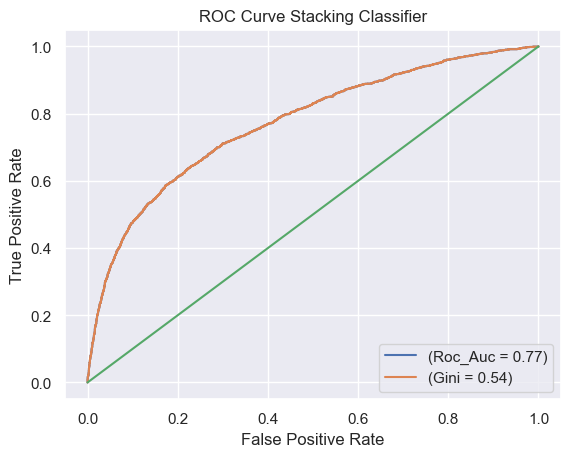

In [111]:
y_prob = stacking_model_dum.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()